In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from glob import glob

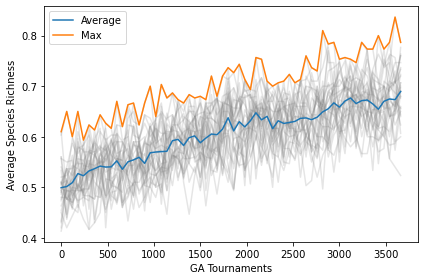

In [2]:
df = pd.read_csv('../data/complete1/fitness.csv')
no_time = df.drop('time', axis=1)
df['average'] = no_time.mean(axis=1)
df['max'] = no_time.max(axis=1)
for i in range(30):
    plt.plot(df['time'], df[[str(i)]], c='grey', alpha=0.2)
plt.plot(df['time'], df['average'], c='C0', label = 'Average')
plt.plot(df['time'], df['max'], c='C1', label = 'Max')
plt.legend()
plt.xlabel('GA Tournaments')
plt.ylabel('Average Species Richness')
plt.tight_layout()
plt.savefig('../figures/fitness.png')
plt.savefig('../figures/fitness.pdf')
plt.show()

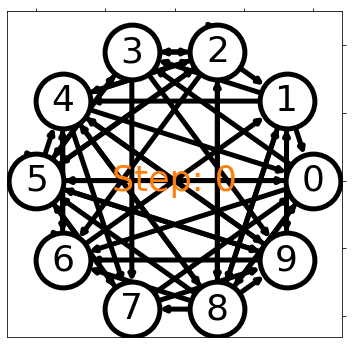

In [57]:
# use network 28
# load all of these networks in networkx form throw into a list
network_times = sorted(glob('../data/complete1/networks/*'))
net_list = []
step_nums = []
for dir in sorted(network_times):
    step_num = dir.split('/')[-1]
    step_nums.append(int(step_num))
    am = pd.read_csv(dir + '/28_adjmat_10.csv', header=None).values[:, :-1]
    D = nx.from_numpy_array(am, create_using=nx.DiGraph)
    net_list.append(D)

sort_idx = np.argsort(step_nums)
steps = np.sort(step_nums)
net_list = [net_list[i] for i in sort_idx]

fig, ax = plt.subplots(figsize=(6,6))
pos_dict = nx.circular_layout(net_list[i], scale=1)
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
def animate(i):
    ax.clear()
    nx.draw_networkx(net_list[i], pos=pos_dict, ax=ax, **options)
    ax.text(0, 0, 'Step: {}'.format(i*60), c='C1', ha='center', va='center', size=35)

ani = FuncAnimation(fig, animate, frames=len(net_list), interval=250)
#ani.save('../figures/animate.mp4')
nx.draw_networkx(net_list[25], pos=pos_dict, ax=ax, **options)
ax.text(0, 0, 'Step: {}'.format(25*60), c='C1', ha='center', va='center', size=35)
plt.savefig('../figures/animate.pdf')


In [51]:
# load all networks
network_times = [network_times[i] for i in sort_idx]
node_ids = np.arange(30)
m_edges = np.zeros((len(sort_idx), len(node_ids)))
cycles = np.zeros((len(sort_idx), len(node_ids)))
comps = np.zeros((len(sort_idx), len(node_ids)))

# self-edges
se = [(i, i) for i in range(30)]
for step, dir in enumerate(network_times):
    for i in range(30):
        for j in range(10):
            if (j, j) in D.edges:
                D.remove_edge(j, j)
        am = pd.read_csv(dir + '/' + str(i) + '_adjmat_10.csv', header=None).values[:, :-1]
        D = nx.from_numpy_array(am, create_using=nx.DiGraph)
        m_edges[step][i] = len(D.edges)
        cycle = [len(x) for x in list(nx.cycles.simple_cycles(D))]
        cycles[step][i] = np.max(cycle)
        max_component = np.max([len(x) for x in list(nx.strongly_connected_components(D))])
        comps[step][i] = max_component


        # if step == max(sort_idx):
        #     for j in range(10):
        #         if (j, j) in D.edges:
        #             D.remove_edge(j, j)
        #     nx.write_edgelist(D, '../data/complete1/networks_mfinder/mfinder_{}.txt'.format(i), delimiter=' ', data=False)


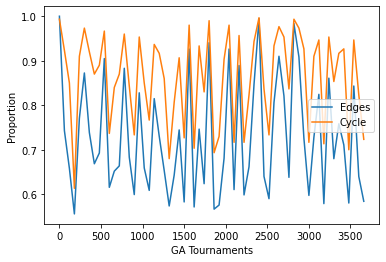

In [52]:
avg_edges = (m_edges / m_edges[0]).mean(axis=1)
avg_cycle = cycles.mean(axis=1) / 10
plt.plot(df['time'], avg_edges, label='Edges')
plt.plot(df['time'], avg_cycle, label='Cycle')
plt.legend()
plt.xlabel('GA Tournaments')
plt.ylabel('Proportion')
plt.savefig('../figures/edges_cycles.png')

In [50]:
D = nx.from_edgelist([(0, 1), (1, 3), (0, 3), (3, 0)], create_using=nx.DiGraph)
list(nx.simple_cycles(D))

[[0, 3], [0, 1, 3]]